In [523]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [524]:
ch = pd.read_csv('Churn.csv')
ch.info()
ch_orig = ch.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [525]:
ch.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [526]:
ch1 = ch[['SeniorCitizen','tenure','MonthlyCharges']]
ch2 = ch.drop(['SeniorCitizen','tenure','MonthlyCharges'],axis=1)
ch3 = ch2.apply(lambda x: x.astype('category'))
ch  = ch3.apply(lambda x: x.cat.codes)
ch[['SeniorCitizen','tenure','MonthlyCharges']] = ch1
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null int16
gender              7043 non-null int8
Partner             7043 non-null int8
Dependents          7043 non-null int8
PhoneService        7043 non-null int8
MultipleLines       7043 non-null int8
InternetService     7043 non-null int8
OnlineSecurity      7043 non-null int8
OnlineBackup        7043 non-null int8
DeviceProtection    7043 non-null int8
TechSupport         7043 non-null int8
StreamingTV         7043 non-null int8
StreamingMovies     7043 non-null int8
Contract            7043 non-null int8
PaperlessBilling    7043 non-null int8
PaymentMethod       7043 non-null int8
TotalCharges        7043 non-null int16
Churn               7043 non-null int8
SeniorCitizen       7043 non-null int64
tenure              7043 non-null int64
MonthlyCharges      7043 non-null float64
dtypes: float64(1), int16(2), int64(2), int8(16)
memory usage: 302.

Text(0.5,1,'Histogram of tenure values for Churn =1')

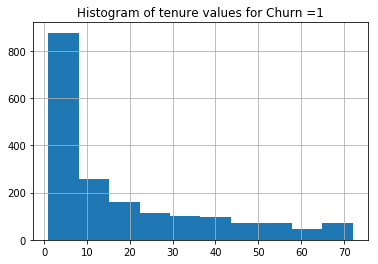

In [527]:
ch.loc[ch.Churn==1,'tenure'].hist()
plt.title('Histogram of tenure values for Churn =1')

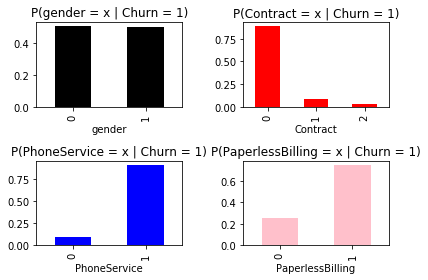

In [528]:
plt.subplot(2,2,1)
(ch.groupby('gender')['Churn'].sum()/ch.groupby('gender')['Churn'].sum().sum()).plot.bar(color='k')
plt.title('P(gender = x | Churn = 1)')
plt.subplot(2,2,2)
(ch.groupby('Contract')['Churn'].sum()/ch.groupby('Contract')['Churn'].sum().sum()).plot.bar(color='r')
plt.title('P(Contract = x | Churn = 1)')
plt.subplot(2,2,3)
(ch.groupby('PhoneService')['Churn'].sum()/ch.groupby('PhoneService')['Churn'].sum().sum()).plot.bar(color='b')
plt.title('P(PhoneService = x | Churn = 1)')
# Phone service and MultipleLines are related, and hence MultipleLines can be dropped
plt.subplot(2,2,4)
(ch.groupby('PaperlessBilling')['Churn'].sum()/ch.groupby('PaperlessBilling')['Churn'].sum().sum()).plot.bar(color='pink')
plt.title('P(PaperlessBilling = x | Churn = 1)')
plt.tight_layout()

In [529]:
(ch.groupby('PaperlessBilling')['Churn'].mean())
print(ch.groupby('PaperlessBilling')['Churn'].sum())
print(ch.PaperlessBilling.value_counts())
1400/1869

PaperlessBilling
0     469.0
1    1400.0
Name: Churn, dtype: float64
1    4171
0    2872
Name: PaperlessBilling, dtype: int64


0.7490636704119851

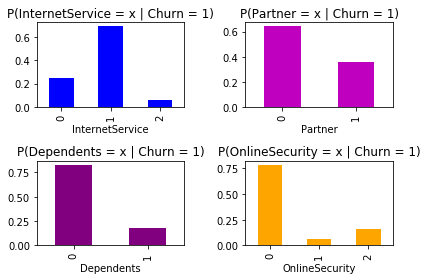

In [530]:
plt.subplot(2,2,1)
(ch.groupby('InternetService')['Churn'].sum()/ch.groupby('InternetService')['Churn'].sum().sum()).plot.bar(color='b')
plt.title('P(InternetService = x | Churn = 1)')
plt.subplot(2,2,2)
(ch.groupby('Partner')['Churn'].sum()/ch.groupby('Partner')['Churn'].sum().sum()).plot.bar(color='m')
plt.title('P(Partner = x | Churn = 1)')
plt.subplot(2,2,3)
(ch.groupby('Dependents')['Churn'].sum()/ch.groupby('Dependents')['Churn'].sum().sum()).plot.bar(color='purple')
plt.title('P(Dependents = x | Churn = 1)')
plt.subplot(2,2,4)
(ch.groupby('OnlineSecurity')['Churn'].sum()/ch.groupby('OnlineSecurity')['Churn'].sum().sum()).plot.bar(color='orange')
plt.title('P(OnlineSecurity = x | Churn = 1)')
plt.tight_layout()

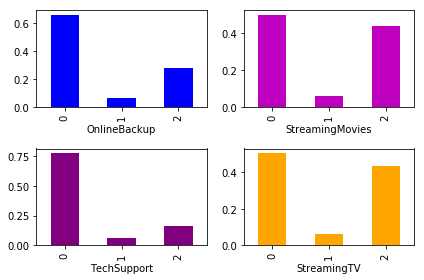

In [531]:
plt.subplot(2,2,1)
(ch.groupby('OnlineBackup')['Churn'].sum()/ch.groupby('OnlineBackup')['Churn'].sum().sum()).plot.bar(color='b')
plt.subplot(2,2,2)
#(ch.groupby('DeviceProtection')['Churn'].sum()/ch.groupby('DeviceProtection')['Churn'].sum().sum()).plot.bar(color='m')
(ch.groupby('StreamingMovies')['Churn'].sum()/ch.groupby('StreamingMovies')['Churn'].sum().sum()).plot.bar(color='m')
plt.subplot(2,2,3)
(ch.groupby('TechSupport')['Churn'].sum()/ch.groupby('TechSupport')['Churn'].sum().sum()).plot.bar(color='purple')
plt.subplot(2,2,4)
(ch.groupby('StreamingTV')['Churn'].sum()/ch.groupby('StreamingTV')['Churn'].sum().sum()).plot.bar(color='orange')
plt.tight_layout()

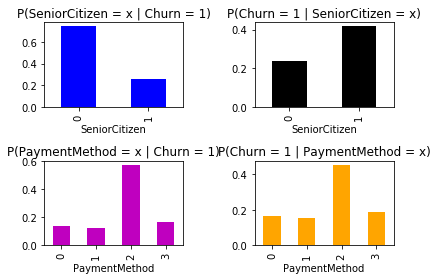

In [532]:
plt.subplot(2,2,1)
(ch.groupby('SeniorCitizen')['Churn'].sum()/ch.groupby('SeniorCitizen')['Churn'].sum().sum()).plot.bar(color='b')
plt.title('P(SeniorCitizen = x | Churn = 1)')
plt.subplot(2,2,2)
(ch.groupby('SeniorCitizen')['Churn'].mean()).plot.bar(color='k')
plt.title('P(Churn = 1 | SeniorCitizen = x)')
plt.subplot(2,2,3)
(ch.groupby('PaymentMethod')['Churn'].sum()/ch.groupby('PaymentMethod')['Churn'].sum().sum()).plot.bar(color='m')
plt.title('P(PaymentMethod = x | Churn = 1)')
plt.subplot(2,2,4)
(ch.groupby('PaymentMethod')['Churn'].mean()).plot.bar(color='orange')
plt.title('P(Churn = 1 | PaymentMethod = x)')
plt.tight_layout()

In [533]:
print(ch.SeniorCitizen.value_counts())
print(ch.groupby('SeniorCitizen')['Churn'].sum())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64
SeniorCitizen
0    1393.0
1     476.0
Name: Churn, dtype: float64


Text(0.5,1,'Histogram of Total charges for Churn = 1')

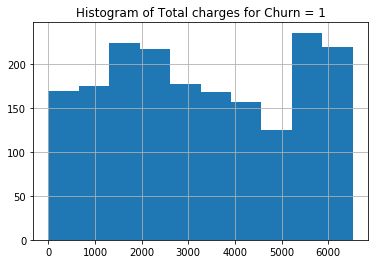

In [534]:
ch.loc[ch.Churn==1,'TotalCharges'].hist()
plt.title('Histogram of Total charges for Churn = 1')

Text(0.5,1,'Histogram of Monthly charges for Churn = 1')

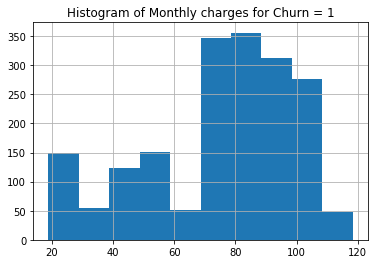

In [535]:
ch.loc[ch.Churn==1,'MonthlyCharges'].hist()
plt.title('Histogram of Monthly charges for Churn = 1')

In [536]:
y = ch.Churn
#ch['tenure'] = ch['tenure'].apply(lambda x: np.log(x))
X = np.array(ch.drop(['customerID','Churn','gender'],axis=1,inplace=False))
X.shape

(7043, 18)

In [537]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [538]:
scaler = StandardScaler()
Xtrain, Xtest, ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [539]:
dec_tree = DecisionTreeClassifier(random_state=21)
pipetree = make_pipeline(scaler,dec_tree)
dec_tree.fit(Xtrain,ytrain)
print("Train accuracy",dec_tree.score(Xtrain,ytrain))
print("Test accuracy",dec_tree.score(Xtest,ytest))

Train accuracy 0.997971602434
Test accuracy 0.739233317558


In [540]:
import sklearn.metrics as metrics
scores = cross_val_score( pipetree, Xtrain, ytrain, cv=5)
print(scores)

[ 0.72109533  0.73225152  0.72616633  0.72718053  0.72210953]


In [541]:
rand_forest = RandomForestClassifier(n_estimators=14, random_state=21)
pipeforest = make_pipeline(scaler,rand_forest) 
pipeforest.fit(Xtrain,ytrain)
print("Train accuracy",pipeforest.score(Xtrain,ytrain))
print("Test accuracy",pipeforest.score(Xtest,ytest))

Train accuracy 0.987626774848
Test accuracy 0.781353525793


In [542]:
svc_model = SVC(C=3, random_state=21)
pipesvc = make_pipeline(scaler,svc_model) 
svc_model.fit(Xtrain,ytrain)
print("Train accuracy",svc_model.score(Xtrain,ytrain))
print("Test accuracy",svc_model.score(Xtest,ytest))

Train accuracy 0.988235294118
Test accuracy 0.747278750592


In [543]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(Xtrain,ytrain)
print("Train accuracy",logreg.score(Xtrain,ytrain))
print("Test accuracy",logreg.score(Xtest,ytest))
coeff = logreg.coef_


Train accuracy 0.804462474645
Test accuracy 0.808329389494


In [544]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30,30,30))
pipemlp = make_pipeline(scaler,mlp)
pipemlp.fit(Xtrain,ytrain)
print("Train accuracy",pipemlp.score(Xtrain,ytrain))
print("Test accuracy",pipemlp.score(Xtest,ytest))

Train accuracy 0.904665314402
Test accuracy 0.753431140558


In [545]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(Xtrain,ytrain)
y_pred = nb_model.predict(Xtest)
print("Train accuracy",nb_model.score(Xtrain,ytrain))
print("Test accuracy",nb_model.score(Xtest,ytest))

Train accuracy 0.755172413793
Test accuracy 0.755797444392


(array([ 2.,  3.,  3.,  4.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  1.]),
 array([ 0.19341613,  0.38049299,  0.56756985,  0.75464671,  0.94172357,
         1.12880043,  1.31587729,  1.50295415,  1.69003101,  1.87710787,
         2.06418473,  2.25126159,  2.43833845,  2.62541531,  2.81249217,
         2.99956903,  3.18664589,  3.37372275,  3.56079961]),
 <a list of 18 Patch objects>)

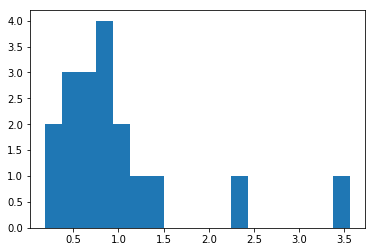

In [546]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
XX = scaler.fit_transform(X)
pca = PCA()
XX1 = pca.fit_transform(XX)
plt.hist(pca.explained_variance_,bins=pca.n_components_)

In [547]:
XX = XX1[:,:]
Xtrain, Xtest, ytrain,ytest = train_test_split(XX,y,test_size=0.3,random_state=42)
rand_forest = RandomForestClassifier(n_estimators=14, random_state=21)
rand_forest.fit(Xtrain,ytrain)
print("Train accuracy",rand_forest.score(Xtrain,ytrain))
print("Test accuracy",rand_forest.score(Xtest,ytest))

Train accuracy 0.988843813387
Test accuracy 0.774727875059


In [548]:
coeff.shape

(1, 18)

In [549]:
pp = ch.drop(['customerID','Churn','gender'],axis=1,inplace=False)

In [550]:
pp.columns

Index(['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'SeniorCitizen',
       'tenure', 'MonthlyCharges'],
      dtype='object')

In [551]:
np.argsort(coeff)

array([[ 2, 11,  5,  8,  1,  6,  7,  9, 16, 14,  0, 17, 13, 10,  3, 15,  4,
        12]], dtype=int64)

In [552]:
pp.columns[4]

'InternetService'

In [553]:
ch.InternetService.value_counts()

1    3096
0    2421
2    1526
Name: InternetService, dtype: int64

In [554]:
ch.groupby('InternetService')['Churn'].sum()

InternetService
0     459.0
1    1297.0
2     113.0
Name: Churn, dtype: float64

In [555]:
coeff[0,np.argsort(abs(coeff))]

array([[  6.11505654e-05,   1.10847342e-02,   2.62707328e-02,
         -3.32884195e-02,   4.84937338e-02,  -5.40856214e-02,
         -5.57335451e-02,   5.85539933e-02,   8.41120482e-02,
         -1.47323989e-01,  -1.53444046e-01,   2.09363815e-01,
         -2.21078848e-01,   2.30202627e-01,  -2.84417579e-01,
          3.02846555e-01,  -7.17538085e-01,  -9.45321248e-01]])

In [556]:
pp.columns[np.argsort(abs(coeff))]

Index([['TotalCharges', 'Partner', 'MonthlyCharges', 'tenure', 'PaymentMethod', 'StreamingTV', 'DeviceProtection', 'StreamingMovies', 'MultipleLines', 'OnlineBackup', 'Dependents', 'SeniorCitizen', 'TechSupport', 'InternetService', 'OnlineSecurity', 'PaperlessBilling', 'Contract', 'PhoneService']], dtype='object')

In [557]:
np.argsort(abs(coeff))

array([[14,  0, 17, 16, 13,  9,  7, 10,  3,  6,  1, 15,  8,  4,  5, 12, 11,
         2]], dtype=int64)

In [558]:
coeff

array([[  1.10847342e-02,  -1.53444046e-01,  -9.45321248e-01,
          8.41120482e-02,   2.30202627e-01,  -2.84417579e-01,
         -1.47323989e-01,  -5.57335451e-02,  -2.21078848e-01,
         -5.40856214e-02,   5.85539933e-02,  -7.17538085e-01,
          3.02846555e-01,   4.84937338e-02,   6.11505654e-05,
          2.09363815e-01,  -3.32884195e-02,   2.62707328e-02]])

In [559]:
fi = dec_tree.feature_importances_ 
fi[np.argsort(fi)]
pp.columns[np.argsort(fi)]

Index(['PhoneService', 'StreamingTV', 'StreamingMovies', 'OnlineBackup',
       'MultipleLines', 'DeviceProtection', 'TechSupport', 'PaperlessBilling',
       'Dependents', 'SeniorCitizen', 'Partner', 'InternetService',
       'PaymentMethod', 'OnlineSecurity', 'tenure', 'Contract', 'TotalCharges',
       'MonthlyCharges'],
      dtype='object')